In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    r2_score, mean_squared_error
)

import joblib
import os


In [5]:
df = pd.read_csv("sonar.csv")
df.head()


,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [6]:
df.isnull().sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

In [7]:
# Drop missing values
df = df.dropna()

# Encode string (categorical) values to numeric
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

df.head()


,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,1


In [8]:
X = df.iloc[:, :-1]  # All columns except last
y = df.iloc[:, -1]   # Last column = target


In [10]:
problem_type="classification"

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [17]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestClassifier, RandomForestRegressor,
    GradientBoostingClassifier, GradientBoostingRegressor
)
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

if problem_type == 'classification':
    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Support Vector Machine': SVC(),
        'Naive Bayes': GaussianNB(),
        'Gradient Boosting': GradientBoostingClassifier()
    }
else:
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree Regressor': DecisionTreeRegressor(),
        'Random Forest Regressor': RandomForestRegressor(),
        'KNN Regressor': KNeighborsRegressor(),
        'SVR': SVR(),
        'Gradient Boosting Regressor': GradientBoostingRegressor()
    }


In [18]:
save_path = "saved_models"
os.makedirs(save_path, exist_ok=True)


🚀 Training, Evaluating, and Saving: Logistic Regression
💾 Model saved at: saved_models\logistic_regression.pkl
📚 Cross-Validation Mean Score: 0.6432
✅ Accuracy: 0.7857
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.71      0.67      0.69        15

    accuracy                           0.79        42
   macro avg       0.77      0.76      0.76        42
weighted avg       0.78      0.79      0.78        42



C:\Users\athun\AppData\Local\Temp\ipykernel_13612\2919602167.py:9: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model.fit(X_train, y_train.ravel())
C:\Users\athun\AppData\Local\Temp\ipykernel_13612\2919602167.py:18: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  cv_scores = cross_val_score(model, X_scaled, y.ravel(), cv=5)


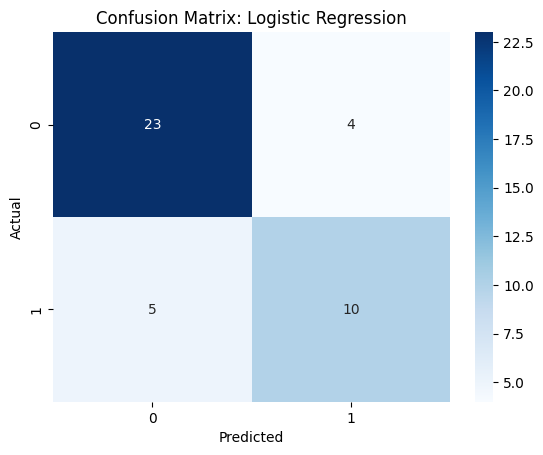

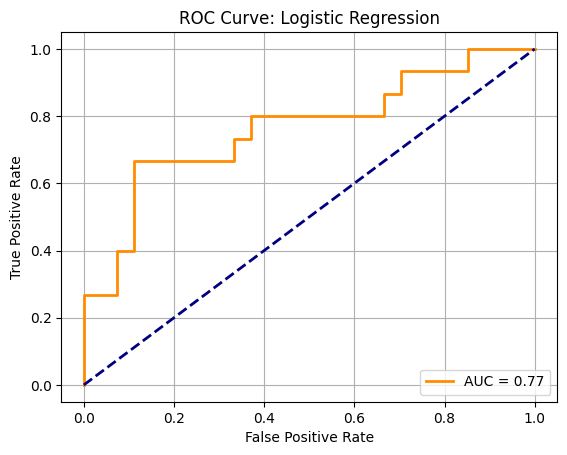

🚀 Training, Evaluating, and Saving: Decision Tree
💾 Model saved at: saved_models\decision_tree.pkl
📚 Cross-Validation Mean Score: 0.6287
✅ Accuracy: 0.5952
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.59      0.65        27
           1       0.45      0.60      0.51        15

    accuracy                           0.60        42
   macro avg       0.59      0.60      0.58        42
weighted avg       0.63      0.60      0.60        42



C:\Users\athun\AppData\Local\Temp\ipykernel_13612\2919602167.py:9: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model.fit(X_train, y_train.ravel())
C:\Users\athun\AppData\Local\Temp\ipykernel_13612\2919602167.py:18: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  cv_scores = cross_val_score(model, X_scaled, y.ravel(), cv=5)


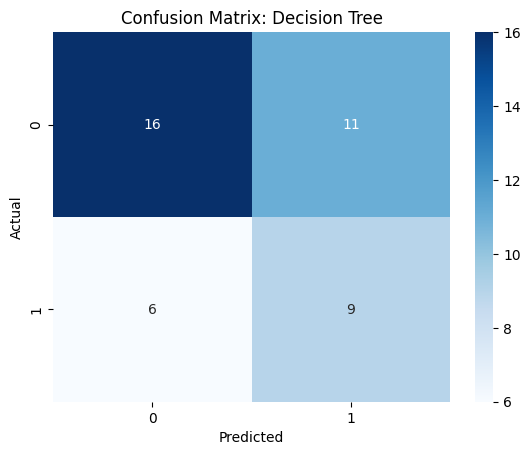

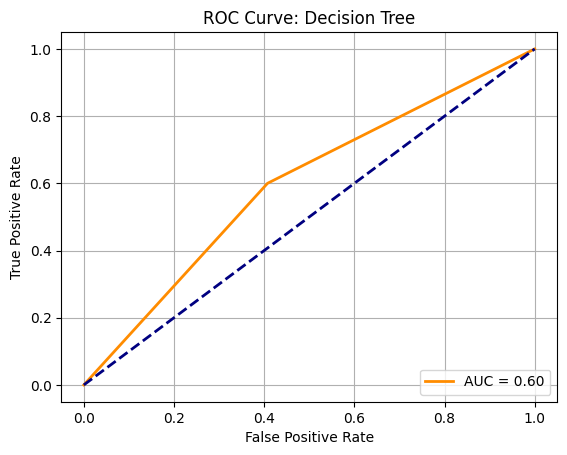

🚀 Training, Evaluating, and Saving: Random Forest
💾 Model saved at: saved_models\random_forest.pkl


C:\Users\athun\AppData\Local\Temp\ipykernel_13612\2919602167.py:9: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model.fit(X_train, y_train.ravel())
C:\Users\athun\AppData\Local\Temp\ipykernel_13612\2919602167.py:18: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  cv_scores = cross_val_score(model, X_scaled, y.ravel(), cv=5)


📚 Cross-Validation Mean Score: 0.6719
✅ Accuracy: 0.8095
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.71      0.80      0.75        15

    accuracy                           0.81        42
   macro avg       0.79      0.81      0.80        42
weighted avg       0.82      0.81      0.81        42



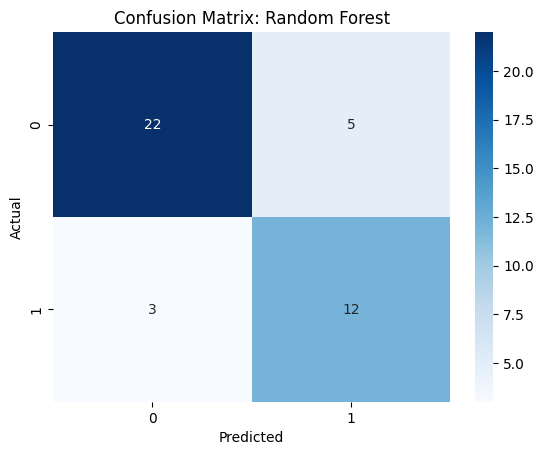

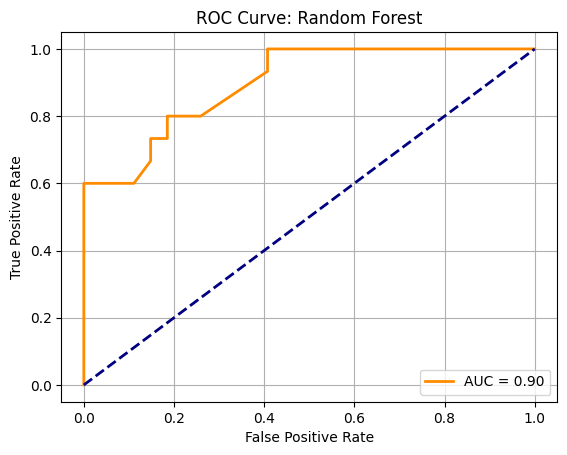

🚀 Training, Evaluating, and Saving: K-Nearest Neighbors
💾 Model saved at: saved_models\k-nearest_neighbors.pkl
📚 Cross-Validation Mean Score: 0.5741
✅ Accuracy: 0.7381
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.62      0.67      0.65        15

    accuracy                           0.74        42
   macro avg       0.72      0.72      0.72        42
weighted avg       0.74      0.74      0.74        42



C:\Users\athun\AppData\Local\Temp\ipykernel_13612\2919602167.py:9: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model.fit(X_train, y_train.ravel())
C:\Users\athun\AppData\Local\Temp\ipykernel_13612\2919602167.py:18: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  cv_scores = cross_val_score(model, X_scaled, y.ravel(), cv=5)


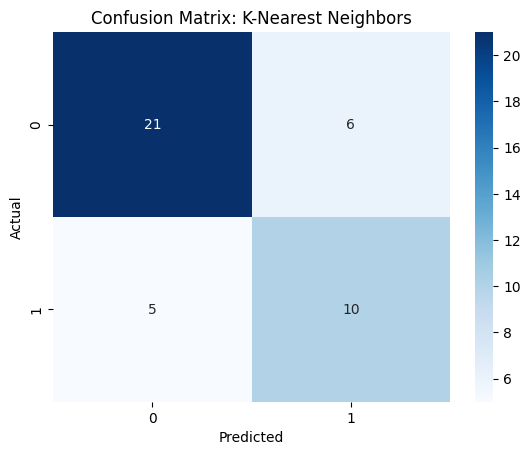

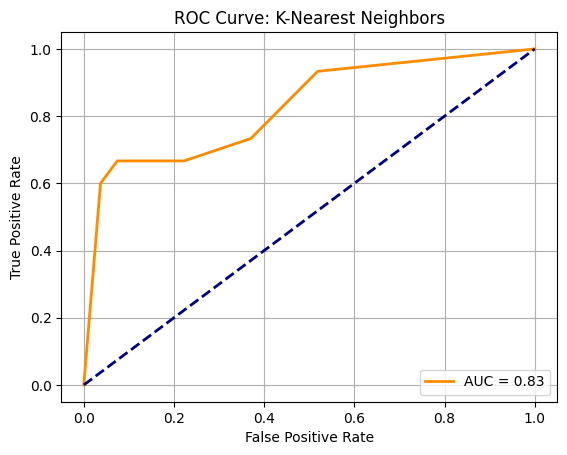

🚀 Training, Evaluating, and Saving: Support Vector Machine
💾 Model saved at: saved_models\support_vector_machine.pkl
📚 Cross-Validation Mean Score: 0.6328
✅ Accuracy: 0.7381
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.61      0.73      0.67        15

    accuracy                           0.74        42
   macro avg       0.72      0.74      0.73        42
weighted avg       0.75      0.74      0.74        42



C:\Users\athun\AppData\Local\Temp\ipykernel_13612\2919602167.py:9: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model.fit(X_train, y_train.ravel())
C:\Users\athun\AppData\Local\Temp\ipykernel_13612\2919602167.py:18: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  cv_scores = cross_val_score(model, X_scaled, y.ravel(), cv=5)


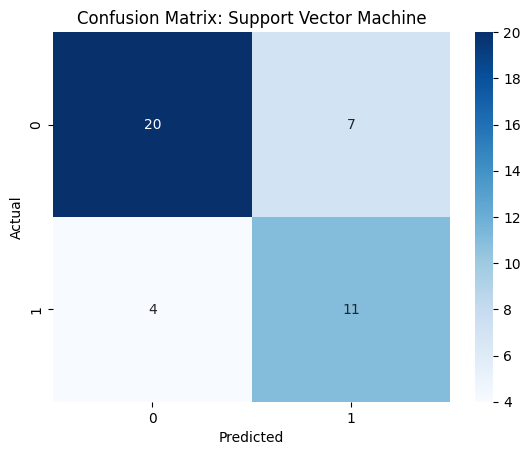

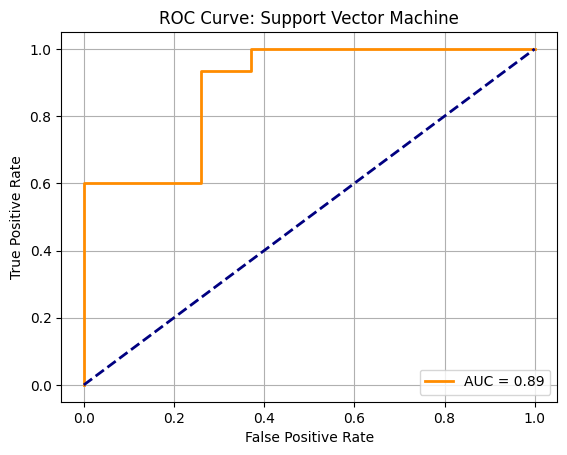

🚀 Training, Evaluating, and Saving: Naive Bayes
💾 Model saved at: saved_models\naive_bayes.pkl
📚 Cross-Validation Mean Score: 0.6367
✅ Accuracy: 0.6429
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.59      0.68        27
           1       0.50      0.73      0.59        15

    accuracy                           0.64        42
   macro avg       0.65      0.66      0.64        42
weighted avg       0.69      0.64      0.65        42



C:\Users\athun\AppData\Local\Temp\ipykernel_13612\2919602167.py:9: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model.fit(X_train, y_train.ravel())
C:\Users\athun\AppData\Local\Temp\ipykernel_13612\2919602167.py:18: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  cv_scores = cross_val_score(model, X_scaled, y.ravel(), cv=5)


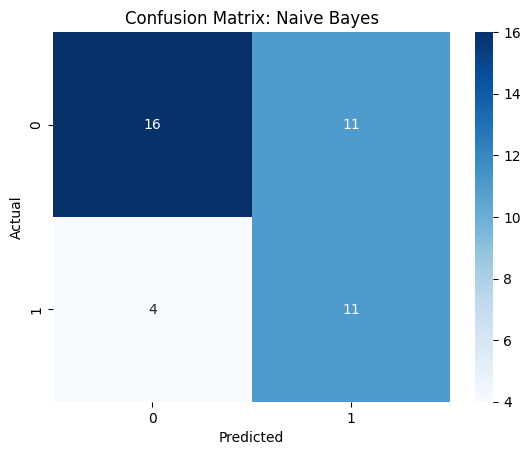

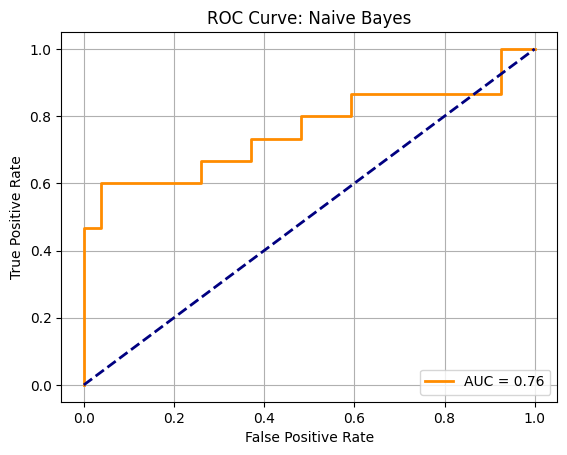

🚀 Training, Evaluating, and Saving: Gradient Boosting


C:\Users\athun\AppData\Local\Temp\ipykernel_13612\2919602167.py:9: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model.fit(X_train, y_train.ravel())


💾 Model saved at: saved_models\gradient_boosting.pkl


C:\Users\athun\AppData\Local\Temp\ipykernel_13612\2919602167.py:18: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  cv_scores = cross_val_score(model, X_scaled, y.ravel(), cv=5)


📚 Cross-Validation Mean Score: 0.7157
✅ Accuracy: 0.8571
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.76      0.87      0.81        15

    accuracy                           0.86        42
   macro avg       0.84      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42



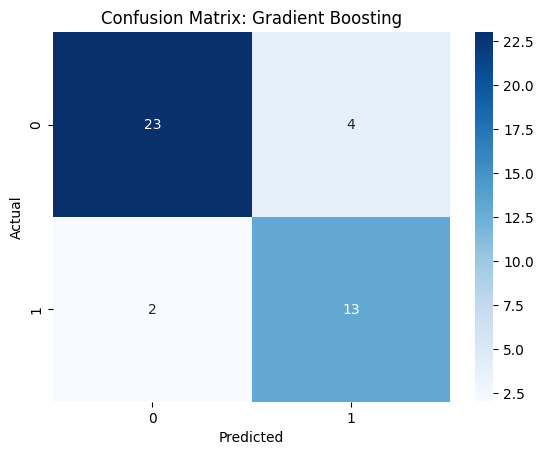

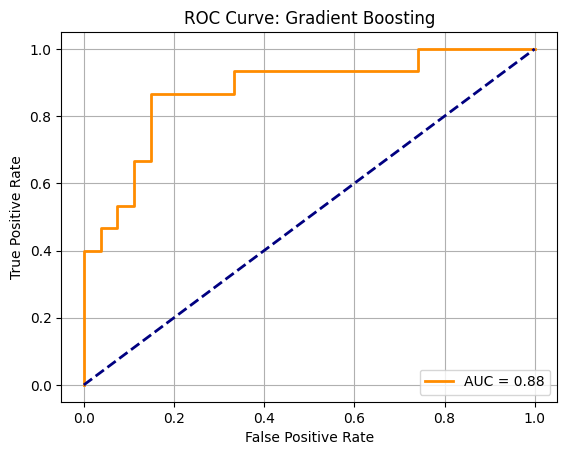

In [23]:
results = []

for name, model in models.items():
    print("=" * 80)
    print(f"🚀 Training, Evaluating, and Saving: {name}")
    print("=" * 80)
    
    # Train
    model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)
    
    # Save model
    filename = os.path.join(save_path, name.replace(" ", "_").lower() + ".pkl")
    joblib.dump(model, filename)
    print(f"💾 Model saved at: {filename}")
    
    # Cross-Validation
    cv_scores = cross_val_score(model, X_scaled, y.ravel(), cv=5)
    mean_cv = np.mean(cv_scores)
    print(f"📚 Cross-Validation Mean Score: {mean_cv:.4f}")
    
    if problem_type == 'classification':
        acc = accuracy_score(y_test, y_pred)
        print(f"✅ Accuracy: {acc:.4f}")
        print("📊 Classification Report:\n", classification_report(y_test, y_pred))
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix: {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        
        # ROC Curve (binary only)
        if len(np.unique(y)) == 2:
            y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            roc_auc = auc(fpr, tpr)

            plt.figure()
            plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve: {name}')
            plt.legend(loc="lower right")
            plt.grid(True)
            plt.show()
        
        results.append({
            'Model': name,
            'Accuracy': acc,
            'Cross-Val Score': mean_cv,
            'R2 Score': None,
            'RMSE': None
        })

In [26]:
import pandas as pd
import numpy as np

print("\n" + "=" * 80)
print("📈 Final Model Comparison Table:")
print("=" * 80)

# Create DataFrame and replace None with np.nan safely
results_df = pd.DataFrame(results)
results_df = results_df.replace({None: np.nan}).infer_objects(copy=False)  # <- avoids FutureWarning

# Nicely formatted printing for terminals/scripts (no display())
rounded_df = results_df.copy()
for col in ['Accuracy', 'Cross-Val Score', 'R2 Score', 'RMSE']:
    if col in rounded_df.columns:
        rounded_df[col] = rounded_df[col].apply(lambda x: f"{x:.4f}" if pd.notnull(x) else "–")

print(rounded_df.to_string(index=False))




📈 Final Model Comparison Table:
                 Model Accuracy Cross-Val Score R2 Score RMSE
   Logistic Regression   0.7857          0.6432        –    –
         Decision Tree   0.5952          0.6287        –    –
         Random Forest   0.8095          0.6719        –    –
   K-Nearest Neighbors   0.7381          0.5741        –    –
Support Vector Machine   0.7381          0.6328        –    –
           Naive Bayes   0.6429          0.6367        –    –
     Gradient Boosting   0.8571          0.7157        –    –


C:\Users\athun\AppData\Local\Temp\ipykernel_13612\4109371941.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  results_df = results_df.replace({None: np.nan}).infer_objects(copy=False)  # <- avoids FutureWarning
